In [1]:
import pandas as pd

ranks = ['Challenger', 'GrandMaster', 'Master']
data = pd.DataFrame()

for rank in ranks:
    data_in = pd.read_csv(rank+'_Ranked_Games.csv')
    data_in['Rank'] = rank
    print("Size of {}: {}".format(rank,data_in.shape))
    data = data.append(data_in, ignore_index=True)
    
# 챌린저, 그랜드 마스터, 마스티어 티어의 데이터를 병합

Size of Challenger: (26904, 51)
Size of GrandMaster: (65896, 51)
Size of Master: (107125, 51)


In [2]:
data.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank
0,4247263043,1323,0,1,0,0,0,0,0,0,...,73016,49832,533,64,12.8,138,8,38711,60463,Challenger
1,4247155821,1317,1,0,0,0,1,0,2,0,...,44218,37136,571,59,11.8,134,3,24829,14105,Challenger
2,4243963257,932,0,0,0,0,0,0,0,0,...,30797,35364,400,50,10.0,89,5,12589,45201,Challenger
3,4241678498,2098,0,0,0,1,1,0,1,1,...,125866,70528,832,84,16.8,205,9,65312,88202,Challenger
4,4241538868,2344,1,1,1,1,1,1,2,2,...,131536,74596,794,85,17.0,227,7,86431,64141,Challenger


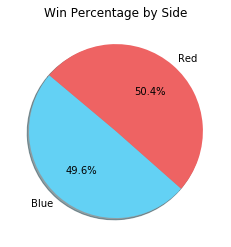

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['Blue', 'Red']
sizes = [data['blueWins'].mean(),  data['redWins'].mean()]
colors = ['#63D1F4', '#EE6363']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=140)
plt.title("Win Percentage by Side")
plt.show()

# 레드 사이드, 블루 사이드는 승패에 영향을 미치지 않는다

Average game length: 23.89 minutes


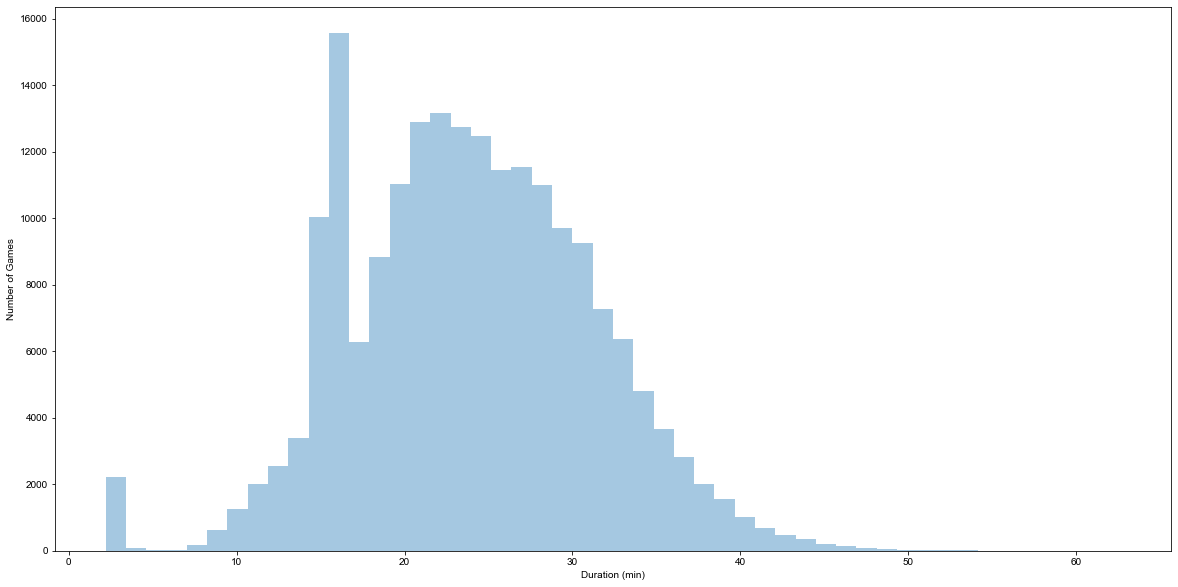

In [4]:
import seaborn as sns

print("Average game length: {:.2f} minutes".format(data['gameDuraton'].mean() / 60))
plt.figure(figsize=(20,10))
sns.distplot(data['gameDuraton'] / 60, hist=True, kde=False)
sns.set(font_scale = 2)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')
plt.show()

# 게임 평균시간은 23.89분


In [5]:
total_minions_killed = data['blueTotalMinionKills'] + data['blueJungleMinionKills'] + data['redTotalMinionKills'] + data['redJungleMinionKills']
total_structures_destroyed = data['blueTowerKills'] + data['blueInhibitorKills'] + data['redTowerKills'] + data['redInhibitorKills']
total_sum_levels = data['blueTotalLevel'] + data['redTotalLevel']
total_wards_placed = data['blueWardPlaced'] + data['blueWardkills'] + data['redWardPlaced'] + data['redWardkills']
played_time = data['gameDuraton'] / 60

# 게임내에서 처치된 총 미니언(미니언, 정글몬스터)의 수
# 게임내에서 파괴된 총 구조물(타워, 억제기)의 수
# 게임내에서 모든 플레이어의 레벨의 총 합
# 게임내에서 설치되고 파괴된 모든 와드의 수
# 게임이 진행된 시간 (분 단위)

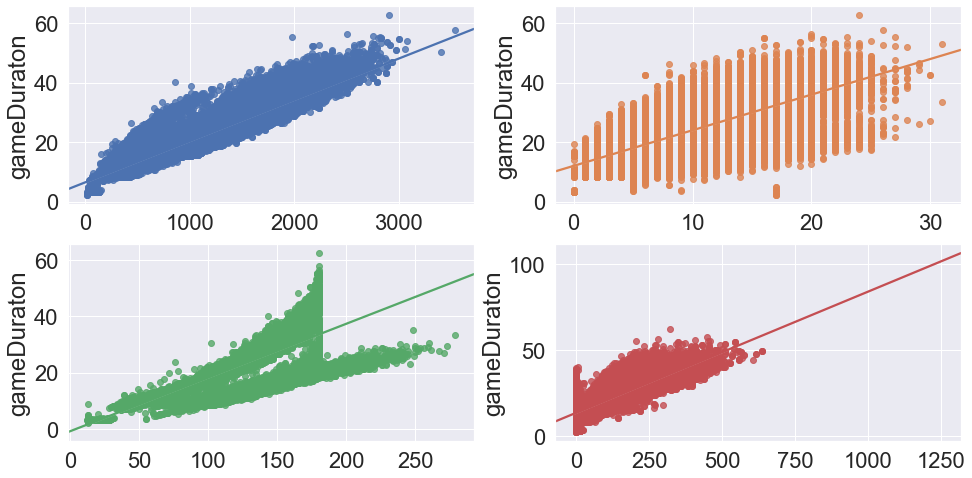

In [7]:
features = [total_minions_killed, total_structures_destroyed, total_sum_levels, total_wards_placed]

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
for i, feature in enumerate(features):
    row = int(i/2)
    col = i % 2
    sns.regplot(x=feature, y=played_time, ax=axs[row][col])
    
# 총 플레이 시간과 각 특성들은 양의 상관관계
# 죽인 미니언수가 많다 = 게임이 길어졌다
# 와드를 설치하고, 파괴한 횟수가 많다 = 게임이 길어졌다
# 아군이 파괴한, 적에 의해 파괴된 구조물이 많다 = 게임이 길어졌다
# 아군, 적군의 총 레벨의 합이 높다 = 게임이 길어졌다

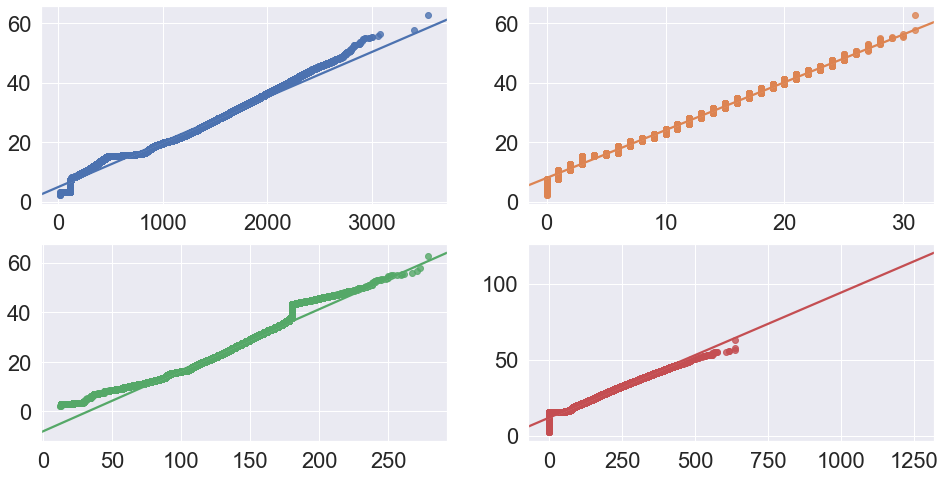

In [8]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=2)
for i, feature in enumerate(features):
    row = int(i/2)
    col = i % 2
    sns.regplot(x=sorted(feature), y=sorted(played_time), ax=axs[row][col])

In [13]:
categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']

blue_percentage_data = {}

for category in categories:
    blue_total = data['blue'+category].sum()
    red_total = data['red'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total / total
    red_percent = red_total / total
    
    blue_percentage_data[category] = blue_percent

In [18]:
blue_percentage_data

{'Wins': 0.4959559834938102,
 'FirstBlood': 0.5076420253748327,
 'FirstTower': 0.5223217677118099,
 'FirstBaron': 0.4763865537758359,
 'FirstDragon': 0.4537316621964317,
 'FirstInhibitor': 0.5082179499950195,
 'DragonKills': 0.47180940254788595,
 'BaronKills': 0.4745674878418241,
 'TowerKills': 0.5039806639372565,
 'InhibitorKills': 0.5054742386471089,
 'WardPlaced': 0.49941338748079084,
 'Wardkills': 0.504182902833805,
 'Kills': 0.5009808030594285,
 'Death': 0.49905724479121055,
 'Assist': 0.5008810251066879,
 'ChampionDamageDealt': 0.5009370042798561,
 'TotalGold': 0.49950751305406843,
 'TotalMinionKills': 0.49729585759309697,
 'TotalLevel': 0.4992286497699531,
 'AvgLevel': 0.49922864976995324,
 'JungleMinionKills': 0.4963604475782811,
 'KillingSpree': 0.5003674295979823,
 'TotalHeal': 0.4961342043334519,
 'ObjectDamageDealt': 0.5015683738585422}

In [15]:
blue_over = {k:v for k,v in blue_percentage_data.items() if (abs(v-0.5) > 0.01) or k=="Wins"}
red_over = {k:1-v for k,v in blue_over.items()}  # 레드 사이드, 블루 사이드는 서로 exclusive

# 양 사이드간의 격차가 큰 변수들

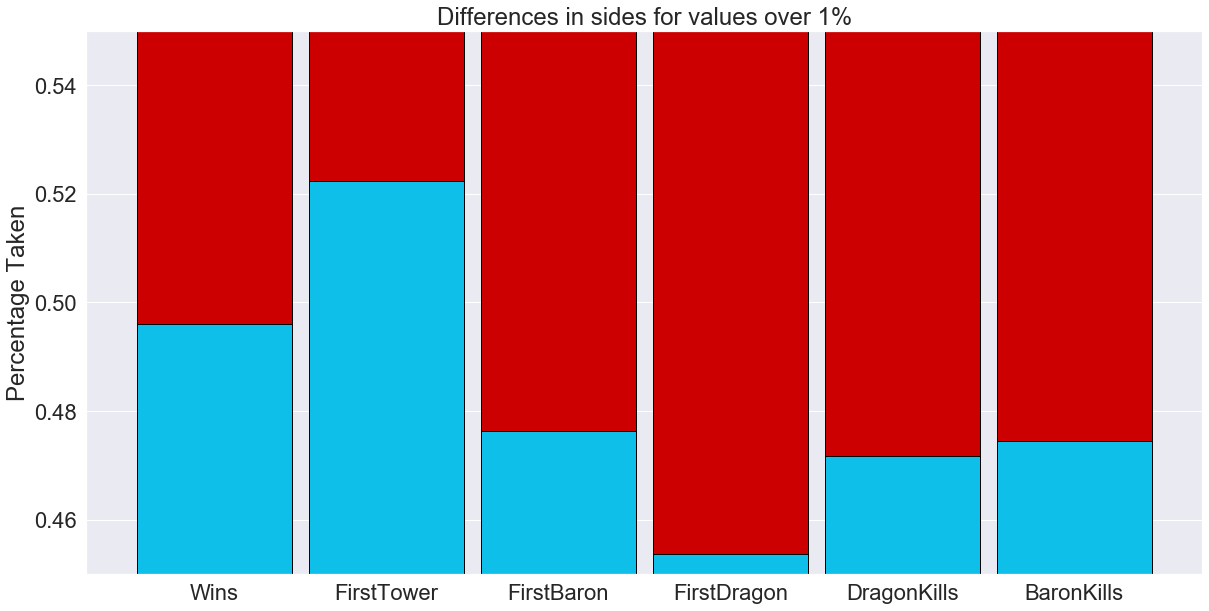

In [16]:
y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9
plt.bar(y, list(blue_over.values()), color='#0EBFE9', edgecolor='black', width=barWidth)
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#cc0000', edgecolor='black', width=barWidth)

plt.xticks(y, blue_over.keys())
plt.ylim((0.45,0.55))
plt.ylabel("Percentage Taken")
plt.title("Differences in sides for values over 1%")
plt.show()

In [23]:
blue_corr = data.drop('Rank', axis=1).corr()['blueWins'][:].sort_values(axis=0, ascending=False) 
red_corr = data.drop('Rank', axis=1).corr()['redWins'][:].sort_values(axis=0, ascending=False) 
blue_corr.head(7)

# 승리와 각 변수간의 상관관계

# 타워를 밀고, 최후 저지선인 억제기를 밀어 넥서스를 공격하는 것이 게임을 이기는 방법
# 억제기는 넥서스와 인접한 곳에 위치해 있기 때문에 상대의 첫번째 억제기를 파괴했다는 것은 승기를 어느정도 굳혔다는 뜻
# 첫번째 타워를 파괴했다고 승기를 잡았다고 하기에는 부족함. (아직 2차, 3차 타워가 존재) - 1
# 첫번째 용을 처치했다고 승기를 잡았다고 하기에는 부족함 - 2
# 퍼스트 블러드는 승패와 매우 낮은 연관성 - 3
# 1, 2 ,3 >>> 초반에 어느 정도 주도권이 있고, 유리하게 시작했다고 해도 언제나 역전의 가능성이 있음

blueWins                 1.000000
blueTowerKills           0.717463
blueFirstInhibitor       0.658354
blueInhibitorKills       0.574076
blueObjectDamageDealt    0.522638
blueFirstTower           0.465065
blueDragonKills          0.454920
Name: blueWins, dtype: float64

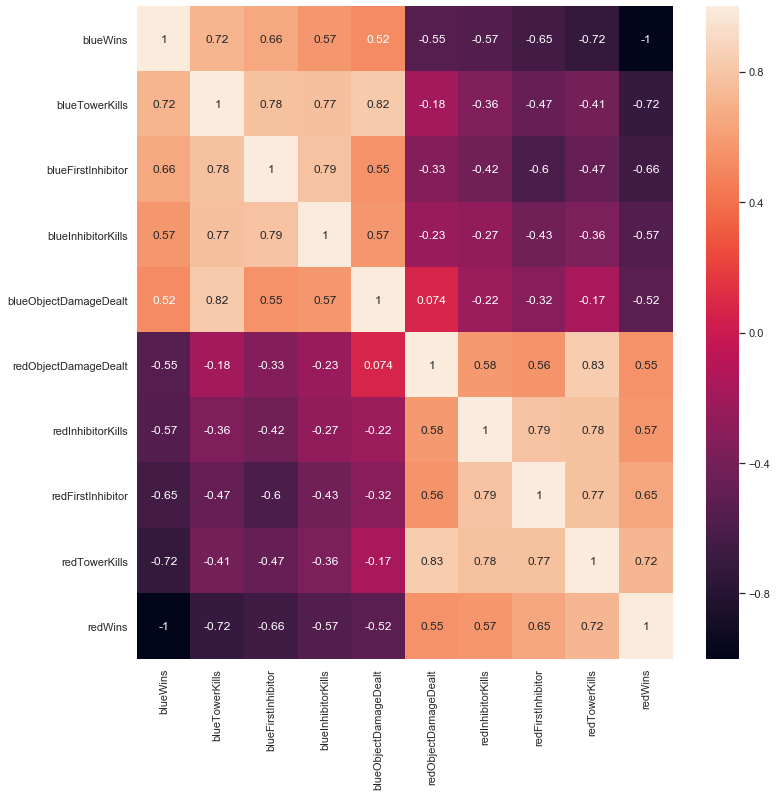

In [27]:
corr_cols = [prop for prop, corr in blue_corr.iteritems() if abs(corr) > 0.5] # 유의미한 상관계수를 가진 변수만 추출
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(data[corr_cols].corr(), annot=True)

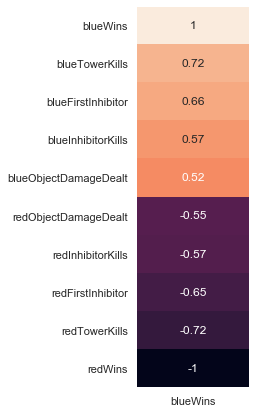

In [28]:
plt.figure(figsize=(2,7))
sns.heatmap(blue_corr[corr_cols].to_frame(), annot=True, cbar=False)

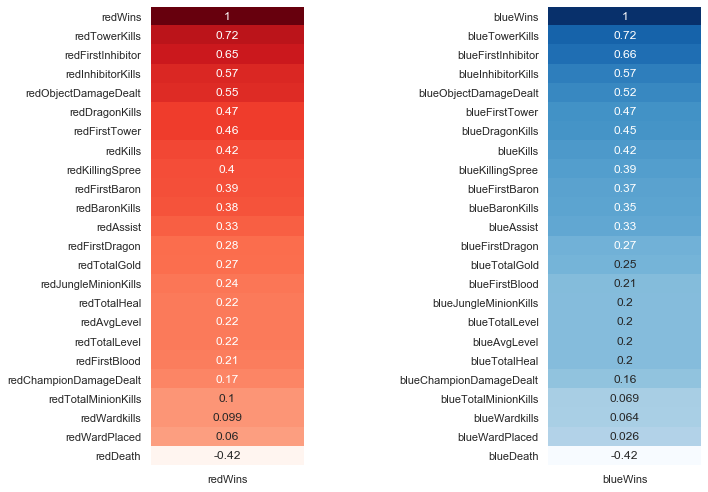

<Figure size 144x504 with 0 Axes>

<Figure size 144x504 with 0 Axes>

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

plt.figure(figsize=(2,7))
red_corra = [prop for prop,corr in blue_corr.iteritems() if 'red' in prop]
sns.heatmap(red_corr[red_corra].sort_values(axis=0, ascending=False).to_frame(), annot=True, cbar=False, ax=axes[0], cmap='Reds')

plt.figure(figsize=(2,7))
blue_corra = [prop for prop,corr in blue_corr.iteritems() if 'blue' in prop]
sns.heatmap(blue_corr[blue_corra].to_frame(), annot=True, cbar=False, ax=axes[1], cmap='Blues')

fig.tight_layout(w_pad=8)
plt.show()

In [41]:
variables = ['FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']

blue_list = []
red_list = []

for variable in variables:
    blue_list.append('blue'+variable)
    red_list.append('red'+variable)

blue_vars = data[blue_list]
red_vars = data[red_list]

# 레드팀, 블루팀의 변수들로만 이루어진 데이터

In [53]:
total_vars = pd.DataFrame()

for i, variable in enumerate(variables):
    total_vars[variable] = blue_vars.iloc[:,i] + red_vars.iloc[:,i]

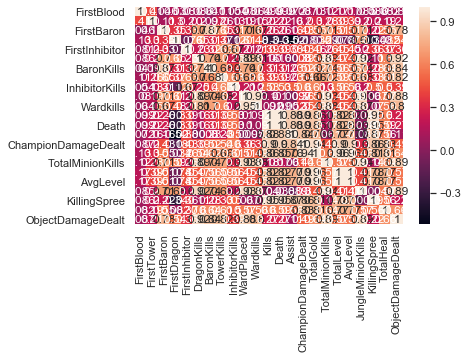

In [57]:
sns.heatmap(total_vars.corr(), annot=True)